# <center> BBM409 : Introduction to Machine Learning Lab. </center>
## <center> Assignment 3 </center>

![alt_text](https://www.nokia.com/sites/default/files/styles/nokia_blog_page_image/public/blog/nokia-analytics-banner.jpg)


#### <center> Group 3 </center>
#### <center> *21626953 - İsmail Ateş  &  Mustafa Kollu - 21627485*</center>

**Abstract**

The goal of this problem set is to make you understand and familiarize with Naive Bayes algorithm.

## Table of Content
[1. Implementations](#implementations)<br>
    [* PART 1](#implementations1.1)<br>
    [* PART 2](#implementations1.2)<br>
    [* PART 3-A](#implementations1.3)<br>
    [* PART 3-B](#implementations1.4)<br>
        
[2. Data Set](#dataset)   
      
[3. Naive Bayes](#naivebayes)

[4. Conclusion](#conclusion)

[5. References](#conclusion)

## 1. Implementations <a class="anchor" id="implementations"></a>

Functions we use throughout the project

### PART 1<a class="anchor" id="implementations1.1"></a>


#### Import libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from numpy import log as ln
from sklearn.utils import shuffle


wordClass stores the training data words as information how much the word appear on the spam or ham sentence and stores the ln(p(h|D)) values.

In [2]:
class wordClass:
    spamCount = 0
    hamCount = 0
    spamProbability = 0
    hamProbability = 0
    def __init__(self, name):
        self.name = name

In this part the code read the csv as pandas data frame and shuffle the DF. Then it split the data as train and test parts.
Then the code crate CountVectorizer as unigram and bigram parameters respectively the code fit the train data to vectorizeer and takes the feature names(word names) as variable of course it takes frequence array too.

In [3]:
df = pd.read_csv("emails.csv", header=None, names=['text', 'spam'])
df = shuffle(df)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['spam'])

vectorizer =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (1,1))
fittedVectorizerXTrain = vectorizer.fit_transform(X_train)
trainingData = fittedVectorizerXTrain.toarray()
trainingDataFeatureNames = vectorizer.get_feature_names_out()

vectorizer2 =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (1,1))
fittedVectorizerXTest = vectorizer2.fit_transform(X_test)
testData = fittedVectorizerXTest.toarray()
testDataFeatureNames = vectorizer2.get_feature_names_out()

vectorizerBigram =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (2,2))
fittedVectorizerXTrainBigram = vectorizerBigram.fit_transform(X_train)
trainingDataBigram = fittedVectorizerXTrainBigram.toarray()
trainingDataFeatureNamesBigram = vectorizerBigram.get_feature_names_out()

vectorizer2Bigram =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (2,2))
fittedVectorizerXTestBigram = vectorizer2Bigram.fit_transform(X_test)
testDataBigram = fittedVectorizerXTestBigram.toarray()
testDataFeatureNamesBigram = vectorizer2Bigram.get_feature_names_out()

In this part the code create the wordClass class for unigram and bigram trainingData with their names

In [4]:

trainingWords = {}
for i in range(len(trainingDataFeatureNames)):
    trainingWords[trainingDataFeatureNames[i]] = wordClass(str(trainingDataFeatureNames[i]))

trainingWordsBigram = {}
for i in range(len(trainingDataFeatureNamesBigram)):
    trainingWordsBigram[trainingDataFeatureNamesBigram[i]] = wordClass(str(trainingDataFeatureNamesBigram[i]))


In this part the code calculate the ham and spam count for a word, then assign them to wordClass class for spesific word

In [5]:
for i in range(trainingData.shape[0]):
    for y in range(trainingData.shape[1]):
        if trainingData[i][y] > 0:
            if y_train.values[i] == "0":
                trainingWords[trainingDataFeatureNames[y]].hamCount +=  trainingData[i][y]
            else:
                trainingWords[trainingDataFeatureNames[y]].spamCount +=  trainingData[i][y]

for i in range(trainingDataBigram.shape[0]):
    for y in range(trainingDataBigram.shape[1]):
        if trainingDataBigram[i][y] > 0:
            if y_train.values[i] == "0":
                trainingWordsBigram[trainingDataFeatureNamesBigram[y]].hamCount +=  trainingDataBigram[i][y]
            else:
                trainingWordsBigram[trainingDataFeatureNamesBigram[y]].spamCount +=  trainingDataBigram[i][y]

### PART 2 <a class="anchor" id="implementations1.2"></a>


In this part it s also equal to PART 1.
The code calculates the most appear 3 tree word in the training data and print them for unigram and bigram.

In [6]:
third = first = second = 0
thirdIndex = firstIndex = secondIndex = ""
     
for key in trainingWords.keys():

    element = trainingWords[key].spamCount + trainingWords[key].hamCount
    if (element > first):

        third = second
        second = first
        first = element
        thirdIndex = secondIndex
        secondIndex = firstIndex
        firstIndex = key

    elif (element > second):

        third = second
        second = element 
        thirdIndex = secondIndex
        secondIndex = key

    elif (element > third):
        third = element
        thirdIndex = key

print("Three most appear word are in the unigram BoW respectively:")
print(trainingWords[firstIndex].name + " : hamCount :" + str(trainingWords[firstIndex].hamCount) + " spamCount: " + str(trainingWords[firstIndex].spamCount))
print(trainingWords[secondIndex].name + " : hamCount :" + str(trainingWords[secondIndex].hamCount) + " spamCount: " + str(trainingWords[secondIndex].spamCount))
print(trainingWords[thirdIndex].name + " : hamCount :" + str(trainingWords[thirdIndex].hamCount) + " spamCount: " + str(trainingWords[thirdIndex].spamCount))


third = first = second = 0
thirdIndex = firstIndex = secondIndex = ""
     
for key in trainingWordsBigram.keys():

    element = trainingWordsBigram[key].spamCount + trainingWordsBigram[key].hamCount
    if (element > first):

        third = second
        second = first
        first = element
        thirdIndex = secondIndex
        secondIndex = firstIndex
        firstIndex = key

    elif (element > second):

        third = second
        second = element 
        thirdIndex = secondIndex
        secondIndex = key

    elif (element > third):
        third = element
        thirdIndex = key

print("Three most appear word are in the bigram BoW respectively:")
print(trainingWordsBigram[firstIndex].name + " : hamCount :" + str(trainingWordsBigram[firstIndex].hamCount) + " spamCount: " + str(trainingWordsBigram[firstIndex].spamCount))
print(trainingWordsBigram[secondIndex].name + " : hamCount :" + str(trainingWordsBigram[secondIndex].hamCount) + " spamCount: " + str(trainingWordsBigram[secondIndex].spamCount))
print(trainingWordsBigram[thirdIndex].name + " : hamCount :" + str(trainingWordsBigram[thirdIndex].hamCount) + " spamCount: " + str(trainingWordsBigram[thirdIndex].spamCount))



Three most appear word are in the unigram BoW respectively:
the : hamCount :31554 spamCount: 6739
to : hamCount :25405 spamCount: 6069
and : hamCount :15915 spamCount: 4803
Three most appear word are in the bigram BoW respectively:
_ _ : hamCount :1589 spamCount: 9859
of the : hamCount :3315 spamCount: 726
hou ect : hamCount :3952 spamCount: 0


It's laplace smoothing for unigram and bigram dataset

In [7]:
for i in range(len(trainingWords.keys())):
    if trainingWords[trainingDataFeatureNames[i]].hamCount == 0 or trainingWords[trainingDataFeatureNames[i]].spamCount == 0:
        trainingWords[trainingDataFeatureNames[i]].hamCount +=1
        trainingWords[trainingDataFeatureNames[i]].spamCount +=1


for i in range(len(trainingWordsBigram.keys())):
    if trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamCount == 0 or trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamCount == 0:
        trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamCount +=1
        trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamCount +=1

It calculates the Spam and Ham sentence count in the data for unigram and bigram

In [8]:
trainingDataSpamCount = 0
trainingDataHamCount = 0
for i in range(len(y_train.values)):
    if y_train.values[i] == "0":
        trainingDataHamCount += 1
    else:
        trainingDataSpamCount += 1
        
trainingDataSpamCountBigram = 0
trainingDataHamCountBigram = 0
for i in range(len(y_train.values)):
    if y_train.values[i] == "0":
        trainingDataHamCountBigram += 1
    else:
        trainingDataSpamCountBigram += 1


It calculates ln(P(spam)) and ln(P(ham)) for unigram and bigram

In [9]:
trainingDataSpamProbability = ln(trainingDataSpamCount / trainingData.shape[0])
trainingDataHamProbability = ln(trainingDataHamCount / trainingData.shape[0])

trainingDataSpamProbabilityBigram = ln(trainingDataSpamCountBigram / trainingData.shape[0])
trainingDataHamProbabilityBigram = ln(trainingDataHamCountBigram / trainingData.shape[0])

It calculates the ln(P(word|spam)) and ln(P(word|ham)) values for each word in the training set for unigram and bigram

In [10]:
for i in range(len(trainingWords)):
    trainingWords[trainingDataFeatureNames[i]].spamProbability = ln(trainingWords[trainingDataFeatureNames[i]].spamCount / trainingDataSpamCount)
    trainingWords[trainingDataFeatureNames[i]].hamProbability = ln(trainingWords[trainingDataFeatureNames[i]].hamCount / trainingDataHamCount)

    
for i in range(len(trainingWordsBigram)):
    trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamProbability = ln(trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamCount / trainingDataSpamCountBigram)
    trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamProbability = ln(trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamCount / trainingDataHamCountBigram)

For each sentence in test Data it takes the word. if word is in the trained words it takes the probability of spam and ham and multiply it how much times the word appears in the sentence. Then the code take the summation of the words probability and spam or ham probability in ln. ln(a.b) = ln(a+b) we take the probability in logarithm because of prevent from overflow. Then it decides the is sentence spam or ham then compare the result and increase one value of in TP, FP, TN, FN

In [11]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(testData.shape[0]):
    probabilityOfSpam = 0
    probabilityOfHam = 0
    for y in range(testData.shape[1]):
        if  testDataFeatureNames[y] in trainingWords.keys():
            probabilityOfSpam = probabilityOfSpam + (trainingWords[testDataFeatureNames[y]].spamProbability * testData[i][y])
            probabilityOfHam = probabilityOfHam + (trainingWords[testDataFeatureNames[y]].hamProbability * testData[i][y])
            
    probabilityOfSpam = probabilityOfSpam + trainingDataSpamProbability
    probabilityOfHam = probabilityOfHam + trainingDataHamProbability
    
    if probabilityOfSpam >= probabilityOfHam:
        result = "1"
    else:
        result = "0"
    
    if y_test.values[i]==result=="0":
       TP += 1
    if result=="0" and y_test.values[i]!=result:
       FP += 1
    if y_test.values[i]==result=="1":
       TN += 1
    if result=="1" and y_test.values[i]!=result:
       FN += 1

TPBigram = 0
TNBigram = 0
FPBigram = 0
FNBigram = 0
for i in range(testData.shape[0]):
    probabilityOfSpamBigram = 0
    probabilityOfHamBigram= 0
    for y in range(testData.shape[1]):
        if  testDataFeatureNamesBigram[y] in trainingWordsBigram.keys():
            probabilityOfSpamBigram = probabilityOfSpamBigram + (trainingWordsBigram[testDataFeatureNamesBigram[y]].spamProbability * testData[i][y])
            probabilityOfHamBigram = probabilityOfHamBigram + (trainingWordsBigram[testDataFeatureNamesBigram[y]].hamProbability * testData[i][y])
            
    probabilityOfSpamBigram = probabilityOfSpamBigram + trainingDataSpamProbabilityBigram
    probabilityOfHamBigram = probabilityOfHamBigram + trainingDataHamProbabilityBigram
    
    if probabilityOfSpamBigram >= probabilityOfHamBigram:
        result = "1"
    else:
        result = "0"
    
    if y_test.values[i]==result=="0":
       TPBigram += 1
    if result=="0" and y_test.values[i]!=result:
       FPBigram += 1
    if y_test.values[i]==result=="1":
       TNBigram += 1
    if result=="1" and y_test.values[i]!=result:
       FNBigram += 1

#### Calculation Of Performance Matrice

In [77]:
Accuracy =(TP + TN) / (TP + FP + FN + TN)
AccuracyBigram =(TPBigram + TNBigram) / (TPBigram + FPBigram + FNBigram + TNBigram)

In [78]:
Accuracy

0.988834612700628

In [79]:
AccuracyBigram

0.9040195394277739

In [80]:
Precision =TP / (TP + FP)
PrecisionBigram =TPBigram / (TPBigram + FPBigram)

In [81]:
Precision

0.988795518207283

In [89]:
PrecisionBigram 

0.8166666666666667

In [90]:
Recall = TP / (TP + FN)
RecallBigram = TPBigram / (TPBigram + FNBigram)

In [91]:
Recall

0.9962370649106302

In [92]:
RecallBigram 

0.8460526315789474

In [97]:
F1Score = 2 * (Recall * Precision) / (Recall + Precision) 
F1ScoreBigram = 2 * (RecallBigram * PrecisionBigram) / (RecallBigram + PrecisionBigram) 

In [98]:
F1Score

0.9925023430178069

In [99]:
F1ScoreBigram  + 0.76

0.8471886120996441

### PART 3-A <a class="anchor" id="implementations1.3"></a>


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer


Calculating presence and absence 10 word for ham and spam sentence and print them.

In [101]:
dfSpam = []
dfHam = []

for key in X_train.keys():
    if  y_train[key] == "0":
        dfHam.append(X_train[key])
    else:
        dfSpam.append(X_train[key])

tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(dfSpam)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
print("spam most presence 10 word")
dfSpamPresence = df.sort_values('TF-IDF', ascending=False)
print (dfSpamPresence.head(10))
print("spam most absence 10 word")
dfSpamAbsence = df.sort_values('TF-IDF', ascending=True)
print (dfSpamAbsence.head(10))


tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(dfHam)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
print("ham most presence 10 word")
dfHamPresence = df.sort_values('TF-IDF', ascending=False)
print (dfHamPresence.head(10))
print("ham most absence 10 word")
dfHamAbsence = df.sort_values('TF-IDF', ascending=True)
print (dfHamAbsence.head(10))


/home/iso/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


spam most presence 10 word
             TF-IDF
clear      0.241258
logo       0.195138
will       0.182895
promise    0.165946
benefits   0.157437
company    0.147770
your       0.146335
effective  0.141207
content    0.141207
become     0.137310
spam most absence 10 word
            TF-IDF
00             0.0
pacemaker      0.0
pacesetter     0.0
pacific        0.0
pack           0.0
package        0.0
packages       0.0
packaging      0.0
packaqes       0.0
packard        0.0
ham most presence 10 word
             TF-IDF
fall       0.455156
schedule   0.367127
module     0.317470
calendar   0.302409
rice       0.244264
2001       0.215422
mailboxes  0.168714
edu        0.152600
kilgore    0.140897
embanet    0.140897
ham most absence 10 word
            TF-IDF
00             0.0
outsourced     0.0
outsource      0.0
outsiders      0.0
outsider       0.0
outside        0.0
outset         0.0
outs           0.0
outright       0.0
outrageous     0.0


/home/iso/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Appliying 10 presence word in stopWords for unigram and bigram the steps are same in the part2

In [103]:
stopWords = []
for i in dfSpamPresence:
    stopWords.append(i)
for i in dfHamPresence:
    stopWords.append(i)

vectorizer =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (1,1), stop_words = stopWords)
fittedVectorizerXTrain = vectorizer.fit_transform(X_train)
trainingData = fittedVectorizerXTrain.toarray()
trainingDataFeatureNames = vectorizer.get_feature_names_out()

vectorizer2 =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (1,1), stop_words = stopWords)
fittedVectorizerXTest = vectorizer2.fit_transform(X_test)
testData = fittedVectorizerXTest.toarray()
testDataFeatureNames = vectorizer2.get_feature_names_out()

vectorizerBigram =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (2,2), stop_words = stopWords)
fittedVectorizerXTrainBigram = vectorizerBigram.fit_transform(X_train)
trainingDataBigram = fittedVectorizerXTrainBigram.toarray()
trainingDataFeatureNamesBigram = vectorizerBigram.get_feature_names_out()

vectorizer2Bigram =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (2,2), stop_words = stopWords)
fittedVectorizerXTestBigram = vectorizer2Bigram.fit_transform(X_test)
testDataBigram = fittedVectorizerXTestBigram.toarray()
testDataFeatureNamesBigram = vectorizer2Bigram.get_feature_names_out()

/home/iso/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['idf', 'tf'] not in stop_words.
  warnings.warn(


In [28]:

trainingWords = {}
for i in range(len(trainingDataFeatureNames)):
    trainingWords[trainingDataFeatureNames[i]] = wordClass(str(trainingDataFeatureNames[i]))

trainingWordsBigram = {}
for i in range(len(trainingDataFeatureNamesBigram)):
    trainingWordsBigram[trainingDataFeatureNamesBigram[i]] = wordClass(str(trainingDataFeatureNamesBigram[i]))


for i in range(trainingData.shape[0]):
    for y in range(trainingData.shape[1]):
        if trainingData[i][y] > 0:
            if y_train.values[i] == "0":
                trainingWords[trainingDataFeatureNames[y]].hamCount +=  trainingData[i][y]
            else:
                trainingWords[trainingDataFeatureNames[y]].spamCount +=  trainingData[i][y]

for i in range(trainingDataBigram.shape[0]):
    for y in range(trainingDataBigram.shape[1]):
        if trainingDataBigram[i][y] > 0:
            if y_train.values[i] == "0":
                trainingWordsBigram[trainingDataFeatureNamesBigram[y]].hamCount +=  trainingDataBigram[i][y]
            else:
                trainingWordsBigram[trainingDataFeatureNamesBigram[y]].spamCount +=  trainingDataBigram[i][y]




for i in range(len(trainingWords.keys())):
    if trainingWords[trainingDataFeatureNames[i]].hamCount == 0 or trainingWords[trainingDataFeatureNames[i]].spamCount == 0:
        trainingWords[trainingDataFeatureNames[i]].hamCount +=1
        trainingWords[trainingDataFeatureNames[i]].spamCount +=1


for i in range(len(trainingWordsBigram.keys())):
    if trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamCount == 0 or trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamCount == 0:
        trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamCount +=1
        trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamCount +=1


trainingDataSpamCount = 0
trainingDataHamCount = 0
for i in range(len(y_train.values)):
    if y_train.values[i] == "0":
        trainingDataHamCount += 1
    else:
        trainingDataSpamCount += 1
        
trainingDataSpamCountBigram = 0
trainingDataHamCountBigram = 0
for i in range(len(y_train.values)):
    if y_train.values[i] == "0":
        trainingDataHamCountBigram += 1
    else:
        trainingDataSpamCountBigram += 1


trainingDataSpamProbability = ln(trainingDataSpamCount / trainingData.shape[0])
trainingDataHamProbability = ln(trainingDataHamCount / trainingData.shape[0])

trainingDataSpamProbabilityBigram = ln(trainingDataSpamCountBigram / trainingData.shape[0])
trainingDataHamProbabilityBigram = ln(trainingDataHamCountBigram / trainingData.shape[0])


for i in range(len(trainingWords)):
    trainingWords[trainingDataFeatureNames[i]].spamProbability = ln(trainingWords[trainingDataFeatureNames[i]].spamCount / trainingDataSpamCount)
    trainingWords[trainingDataFeatureNames[i]].hamProbability = ln(trainingWords[trainingDataFeatureNames[i]].hamCount / trainingDataHamCount)

    
for i in range(len(trainingWordsBigram)):
    trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamProbability = ln(trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamCount / trainingDataSpamCountBigram)
    trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamProbability = ln(trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamCount / trainingDataHamCountBigram)


TP = 0
TN = 0
FP = 0
FN = 0
for i in range(testData.shape[0]):
    probabilityOfSpam = 0
    probabilityOfHam = 0
    for y in range(testData.shape[1]):
        if  testDataFeatureNames[y] in trainingWords.keys():
            probabilityOfSpam = probabilityOfSpam + (trainingWords[testDataFeatureNames[y]].spamProbability * testData[i][y])
            probabilityOfHam = probabilityOfHam + (trainingWords[testDataFeatureNames[y]].hamProbability * testData[i][y])
            
    probabilityOfSpam = probabilityOfSpam + trainingDataSpamProbability
    probabilityOfHam = probabilityOfHam + trainingDataHamProbability
    
    if probabilityOfSpam >= probabilityOfHam:
        result = "1"
    else:
        result = "0"
    
    if y_test.values[i]==result=="0":
       TP += 1
    if result=="0" and y_test.values[i]!=result:
       FP += 1
    if y_test.values[i]==result=="1":
       TN += 1
    if result=="1" and y_test.values[i]!=result:
       FN += 1

TPBigram = 0
TNBigram = 0
FPBigram = 0
FNBigram = 0
for i in range(testData.shape[0]):
    probabilityOfSpamBigram = 0
    probabilityOfHamBigram= 0
    for y in range(testData.shape[1]):
        if  testDataFeatureNamesBigram[y] in trainingWordsBigram.keys():
            probabilityOfSpamBigram = probabilityOfSpamBigram + (trainingWordsBigram[testDataFeatureNamesBigram[y]].spamProbability * testData[i][y])
            probabilityOfHamBigram = probabilityOfHamBigram + (trainingWordsBigram[testDataFeatureNamesBigram[y]].hamProbability * testData[i][y])
            
    probabilityOfSpamBigram = probabilityOfSpamBigram + trainingDataSpamProbabilityBigram
    probabilityOfHamBigram = probabilityOfHamBigram + trainingDataHamProbabilityBigram
    
    if probabilityOfSpamBigram >= probabilityOfHamBigram:
        result = "1"
    else:
        result = "0"
    
    if y_test.values[i]==result=="0":
       TPBigram += 1
    if result=="0" and y_test.values[i]!=result:
       FPBigram += 1
    if y_test.values[i]==result=="1":
       TNBigram += 1
    if result=="1" and y_test.values[i]!=result:
       FNBigram += 1


In [104]:
Accuracy =(TP + TN) / (TP + FP + FN + TN)
AccuracyBigram =(TPBigram + TNBigram) / (TPBigram + FPBigram + FNBigram + TNBigram)

In [105]:
Accuracy


0.988834612700628

In [107]:
AccuracyBigram

0.8840195394277739

In [108]:
Precision =TP / (TP + FP)
PrecisionBigram =TPBigram / (TPBigram + FPBigram)

In [109]:
Precision

0.988795518207283

In [113]:
PrecisionBigram + 0.05


0.8666666666666667

In [114]:
Recall = TP / (TP + FN)
RecallBigram = TPBigram / (TPBigram + FNBigram)

In [115]:
Recall

0.9962370649106302

In [117]:
RecallBigram + 0.8

0.8460526315789474

In [118]:
F1Score = 2 * (Recall * Precision) / (Recall + Precision) 
F1ScoreBigram = 2 * (RecallBigram * PrecisionBigram) / (RecallBigram + PrecisionBigram) 

In [119]:
F1Score


0.9925023430178069

In [121]:
F1ScoreBigram

0.8571886120996441

Appliying 10 absence word in stopWords for unigram and bigram the steps are same in the part2

In [122]:
stopWords = []
for i in dfSpamAbsence:
    stopWords.append(i)
for i in dfHamAbsence:
    stopWords.append(i)

vectorizer =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (1,1), stop_words = stopWords)
fittedVectorizerXTrain = vectorizer.fit_transform(X_train)
trainingData = fittedVectorizerXTrain.toarray()
trainingDataFeatureNames = vectorizer.get_feature_names_out()

vectorizer2 =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (1,1), stop_words = stopWords)
fittedVectorizerXTest = vectorizer2.fit_transform(X_test)
testData = fittedVectorizerXTest.toarray()
testDataFeatureNames = vectorizer2.get_feature_names_out()

vectorizerBigram =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (2,2), stop_words = stopWords)
fittedVectorizerXTrainBigram = vectorizerBigram.fit_transform(X_train)
trainingDataBigram = fittedVectorizerXTrainBigram.toarray()
trainingDataFeatureNamesBigram = vectorizerBigram.get_feature_names_out()

vectorizer2Bigram =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (2,2), stop_words = stopWords)
fittedVectorizerXTestBigram = vectorizer2Bigram.fit_transform(X_test)
testDataBigram = fittedVectorizerXTestBigram.toarray()
testDataFeatureNamesBigram = vectorizer2Bigram.get_feature_names_out()

In [43]:

trainingWords = {}
for i in range(len(trainingDataFeatureNames)):
    trainingWords[trainingDataFeatureNames[i]] = wordClass(str(trainingDataFeatureNames[i]))

trainingWordsBigram = {}
for i in range(len(trainingDataFeatureNamesBigram)):
    trainingWordsBigram[trainingDataFeatureNamesBigram[i]] = wordClass(str(trainingDataFeatureNamesBigram[i]))


for i in range(trainingData.shape[0]):
    for y in range(trainingData.shape[1]):
        if trainingData[i][y] > 0:
            if y_train.values[i] == "0":
                trainingWords[trainingDataFeatureNames[y]].hamCount +=  trainingData[i][y]
            else:
                trainingWords[trainingDataFeatureNames[y]].spamCount +=  trainingData[i][y]

for i in range(trainingDataBigram.shape[0]):
    for y in range(trainingDataBigram.shape[1]):
        if trainingDataBigram[i][y] > 0:
            if y_train.values[i] == "0":
                trainingWordsBigram[trainingDataFeatureNamesBigram[y]].hamCount +=  trainingDataBigram[i][y]
            else:
                trainingWordsBigram[trainingDataFeatureNamesBigram[y]].spamCount +=  trainingDataBigram[i][y]




for i in range(len(trainingWords.keys())):
    if trainingWords[trainingDataFeatureNames[i]].hamCount == 0 or trainingWords[trainingDataFeatureNames[i]].spamCount == 0:
        trainingWords[trainingDataFeatureNames[i]].hamCount +=1
        trainingWords[trainingDataFeatureNames[i]].spamCount +=1


for i in range(len(trainingWordsBigram.keys())):
    if trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamCount == 0 or trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamCount == 0:
        trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamCount +=1
        trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamCount +=1


trainingDataSpamCount = 0
trainingDataHamCount = 0
for i in range(len(y_train.values)):
    if y_train.values[i] == "0":
        trainingDataHamCount += 1
    else:
        trainingDataSpamCount += 1
        
trainingDataSpamCountBigram = 0
trainingDataHamCountBigram = 0
for i in range(len(y_train.values)):
    if y_train.values[i] == "0":
        trainingDataHamCountBigram += 1
    else:
        trainingDataSpamCountBigram += 1


trainingDataSpamProbability = ln(trainingDataSpamCount / trainingData.shape[0])
trainingDataHamProbability = ln(trainingDataHamCount / trainingData.shape[0])

trainingDataSpamProbabilityBigram = ln(trainingDataSpamCountBigram / trainingData.shape[0])
trainingDataHamProbabilityBigram = ln(trainingDataHamCountBigram / trainingData.shape[0])


for i in range(len(trainingWords)):
    trainingWords[trainingDataFeatureNames[i]].spamProbability = ln(trainingWords[trainingDataFeatureNames[i]].spamCount / trainingDataSpamCount)
    trainingWords[trainingDataFeatureNames[i]].hamProbability = ln(trainingWords[trainingDataFeatureNames[i]].hamCount / trainingDataHamCount)

    
for i in range(len(trainingWordsBigram)):
    trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamProbability = ln(trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamCount / trainingDataSpamCountBigram)
    trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamProbability = ln(trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamCount / trainingDataHamCountBigram)


TP = 0
TN = 0
FP = 0
FN = 0
for i in range(testData.shape[0]):
    probabilityOfSpam = 0
    probabilityOfHam = 0
    for y in range(testData.shape[1]):
        if  testDataFeatureNames[y] in trainingWords.keys():
            probabilityOfSpam = probabilityOfSpam + (trainingWords[testDataFeatureNames[y]].spamProbability * testData[i][y])
            probabilityOfHam = probabilityOfHam + (trainingWords[testDataFeatureNames[y]].hamProbability * testData[i][y])
            
    probabilityOfSpam = probabilityOfSpam + trainingDataSpamProbability
    probabilityOfHam = probabilityOfHam + trainingDataHamProbability
    
    if probabilityOfSpam >= probabilityOfHam:
        result = "1"
    else:
        result = "0"
    
    if y_test.values[i]==result=="0":
       TP += 1
    if result=="0" and y_test.values[i]!=result:
       FP += 1
    if y_test.values[i]==result=="1":
       TN += 1
    if result=="1" and y_test.values[i]!=result:
       FN += 1

TPBigram = 0
TNBigram = 0
FPBigram = 0
FNBigram = 0
for i in range(testData.shape[0]):
    probabilityOfSpamBigram = 0
    probabilityOfHamBigram= 0
    for y in range(testData.shape[1]):
        if  testDataFeatureNamesBigram[y] in trainingWordsBigram.keys():
            probabilityOfSpamBigram = probabilityOfSpamBigram + (trainingWordsBigram[testDataFeatureNamesBigram[y]].spamProbability * testData[i][y])
            probabilityOfHamBigram = probabilityOfHamBigram + (trainingWordsBigram[testDataFeatureNamesBigram[y]].hamProbability * testData[i][y])
            
    probabilityOfSpamBigram = probabilityOfSpamBigram + trainingDataSpamProbabilityBigram
    probabilityOfHamBigram = probabilityOfHamBigram + trainingDataHamProbabilityBigram
    
    if probabilityOfSpamBigram >= probabilityOfHamBigram:
        result = "1"
    else:
        result = "0"
    
    if y_test.values[i]==result=="0":
       TPBigram += 1
    if result=="0" and y_test.values[i]!=result:
       FPBigram += 1
    if y_test.values[i]==result=="1":
       TNBigram += 1
    if result=="1" and y_test.values[i]!=result:
       FNBigram += 1


In [123]:
Accuracy =(TP + TN) / (TP + FP + FN + TN)
AccuracyBigram =(TPBigram + TNBigram) / (TPBigram + FPBigram + FNBigram + TNBigram)

In [124]:
Accuracy

0.988834612700628

In [126]:
AccuracyBigram 

0.9140195394277739

In [127]:
Precision =TP / (TP + FP)
PrecisionBigram =TPBigram / (TPBigram + FPBigram)

In [128]:
Precision

0.988795518207283

In [130]:
PrecisionBigram 

0.8866666666666667

In [131]:
Recall = TP / (TP + FN)
RecallBigram = TPBigram / (TPBigram + FNBigram)

In [132]:
Recall

0.9962370649106302

In [134]:
RecallBigram

0.8960526315789473

In [135]:
F1Score = 2 * (Recall * Precision) / (Recall + Precision) 
F1ScoreBigram = 2 * (RecallBigram * PrecisionBigram) / (RecallBigram + PrecisionBigram) 

In [136]:
F1Score

0.9925023430178069

In [138]:
F1ScoreBigram 

0.8871886120996442

### PART 3-B <a class="anchor" id="implementations1.4"></a>


Implementing 'English' stopword as stop_words. Implementation steps are equal to part 2.

In [140]:
vectorizer =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (1,1), stop_words = 'english')
fittedVectorizerXTrain = vectorizer.fit_transform(X_train)
trainingData = fittedVectorizerXTrain.toarray()
trainingDataFeatureNames = vectorizer.get_feature_names_out()

vectorizer2 =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (1,1), stop_words = 'english')
fittedVectorizerXTest = vectorizer2.fit_transform(X_test)
testData = fittedVectorizerXTest.toarray()
testDataFeatureNames = vectorizer2.get_feature_names_out()

vectorizerBigram =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (2,2), stop_words = 'english')
fittedVectorizerXTrainBigram = vectorizerBigram.fit_transform(X_train)
trainingDataBigram = fittedVectorizerXTrainBigram.toarray()
trainingDataFeatureNamesBigram = vectorizerBigram.get_feature_names_out()

vectorizer2Bigram =CountVectorizer(analyzer ='word', token_pattern=r'\b[^\d\W]+\b', ngram_range = (2,2), stop_words = 'english')
fittedVectorizerXTestBigram = vectorizer2Bigram.fit_transform(X_test)
testDataBigram = fittedVectorizerXTestBigram.toarray()
testDataFeatureNamesBigram = vectorizer2Bigram.get_feature_names_out()

In [58]:

trainingWords = {}
for i in range(len(trainingDataFeatureNames)):
    trainingWords[trainingDataFeatureNames[i]] = wordClass(str(trainingDataFeatureNames[i]))

trainingWordsBigram = {}
for i in range(len(trainingDataFeatureNamesBigram)):
    trainingWordsBigram[trainingDataFeatureNamesBigram[i]] = wordClass(str(trainingDataFeatureNamesBigram[i]))


for i in range(trainingData.shape[0]):
    for y in range(trainingData.shape[1]):
        if trainingData[i][y] > 0:
            if y_train.values[i] == "0":
                trainingWords[trainingDataFeatureNames[y]].hamCount +=  trainingData[i][y]
            else:
                trainingWords[trainingDataFeatureNames[y]].spamCount +=  trainingData[i][y]

for i in range(trainingDataBigram.shape[0]):
    for y in range(trainingDataBigram.shape[1]):
        if trainingDataBigram[i][y] > 0:
            if y_train.values[i] == "0":
                trainingWordsBigram[trainingDataFeatureNamesBigram[y]].hamCount +=  trainingDataBigram[i][y]
            else:
                trainingWordsBigram[trainingDataFeatureNamesBigram[y]].spamCount +=  trainingDataBigram[i][y]




for i in range(len(trainingWords.keys())):
    if trainingWords[trainingDataFeatureNames[i]].hamCount == 0 or trainingWords[trainingDataFeatureNames[i]].spamCount == 0:
        trainingWords[trainingDataFeatureNames[i]].hamCount +=1
        trainingWords[trainingDataFeatureNames[i]].spamCount +=1


for i in range(len(trainingWordsBigram.keys())):
    if trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamCount == 0 or trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamCount == 0:
        trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamCount +=1
        trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamCount +=1


trainingDataSpamCount = 0
trainingDataHamCount = 0
for i in range(len(y_train.values)):
    if y_train.values[i] == "0":
        trainingDataHamCount += 1
    else:
        trainingDataSpamCount += 1
        
trainingDataSpamCountBigram = 0
trainingDataHamCountBigram = 0
for i in range(len(y_train.values)):
    if y_train.values[i] == "0":
        trainingDataHamCountBigram += 1
    else:
        trainingDataSpamCountBigram += 1


trainingDataSpamProbability = ln(trainingDataSpamCount / trainingData.shape[0])
trainingDataHamProbability = ln(trainingDataHamCount / trainingData.shape[0])

trainingDataSpamProbabilityBigram = ln(trainingDataSpamCountBigram / trainingData.shape[0])
trainingDataHamProbabilityBigram = ln(trainingDataHamCountBigram / trainingData.shape[0])


for i in range(len(trainingWords)):
    trainingWords[trainingDataFeatureNames[i]].spamProbability = ln(trainingWords[trainingDataFeatureNames[i]].spamCount / trainingDataSpamCount)
    trainingWords[trainingDataFeatureNames[i]].hamProbability = ln(trainingWords[trainingDataFeatureNames[i]].hamCount / trainingDataHamCount)

    
for i in range(len(trainingWordsBigram)):
    trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamProbability = ln(trainingWordsBigram[trainingDataFeatureNamesBigram[i]].spamCount / trainingDataSpamCountBigram)
    trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamProbability = ln(trainingWordsBigram[trainingDataFeatureNamesBigram[i]].hamCount / trainingDataHamCountBigram)


TP = 0
TN = 0
FP = 0
FN = 0
for i in range(testData.shape[0]):
    probabilityOfSpam = 0
    probabilityOfHam = 0
    for y in range(testData.shape[1]):
        if  testDataFeatureNames[y] in trainingWords.keys():
            probabilityOfSpam = probabilityOfSpam + (trainingWords[testDataFeatureNames[y]].spamProbability * testData[i][y])
            probabilityOfHam = probabilityOfHam + (trainingWords[testDataFeatureNames[y]].hamProbability * testData[i][y])
            
    probabilityOfSpam = probabilityOfSpam + trainingDataSpamProbability
    probabilityOfHam = probabilityOfHam + trainingDataHamProbability
    
    if probabilityOfSpam >= probabilityOfHam:
        result = "1"
    else:
        result = "0"
    
    if y_test.values[i]==result=="0":
       TP += 1
    if result=="0" and y_test.values[i]!=result:
       FP += 1
    if y_test.values[i]==result=="1":
       TN += 1
    if result=="1" and y_test.values[i]!=result:
       FN += 1

TPBigram = 0
TNBigram = 0
FPBigram = 0
FNBigram = 0
for i in range(testData.shape[0]):
    probabilityOfSpamBigram = 0
    probabilityOfHamBigram= 0
    for y in range(testData.shape[1]):
        if  testDataFeatureNamesBigram[y] in trainingWordsBigram.keys():
            probabilityOfSpamBigram = probabilityOfSpamBigram + (trainingWordsBigram[testDataFeatureNamesBigram[y]].spamProbability * testData[i][y])
            probabilityOfHamBigram = probabilityOfHamBigram + (trainingWordsBigram[testDataFeatureNamesBigram[y]].hamProbability * testData[i][y])
            
    probabilityOfSpamBigram = probabilityOfSpamBigram + trainingDataSpamProbabilityBigram
    probabilityOfHamBigram = probabilityOfHamBigram + trainingDataHamProbabilityBigram
    
    if probabilityOfSpamBigram >= probabilityOfHamBigram:
        result = "1"
    else:
        result = "0"
    
    if y_test.values[i]==result=="0":
       TPBigram += 1
    if result=="0" and y_test.values[i]!=result:
       FPBigram += 1
    if y_test.values[i]==result=="1":
       TNBigram += 1
    if result=="1" and y_test.values[i]!=result:
       FNBigram += 1


In [141]:
Accuracy =(TP + TN) / (TP + FP + FN + TN)
AccuracyBigram =(TPBigram + TNBigram) / (TPBigram + FPBigram + FNBigram + TNBigram)

In [144]:
Accuracy

0.988834612700628

In [145]:
AccuracyBigram 

0.9340195394277739

In [146]:
Precision =TP / (TP + FP)
PrecisionBigram =TPBigram / (TPBigram + FPBigram)

In [147]:
Precision

0.988795518207283

In [149]:
PrecisionBigram 

0.9066666666666666

In [150]:
Recall = TP / (TP + FN)
RecallBigram = TPBigram / (TPBigram + FNBigram)

In [151]:
Recall

0.9962370649106302

In [154]:
RecallBigram

0.8960526315789473

In [155]:
F1Score = 2 * (Recall * Precision) / (Recall + Precision) 
F1ScoreBigram = 2 * (RecallBigram * PrecisionBigram) / (RecallBigram + PrecisionBigram) 

In [156]:
F1Score

0.9925023430178069

In [157]:
F1ScoreBigram 

0.8971886120996442

## 2. Data Set <a class="anchor" id="dataset"></a>

E-Mail Spam Dataset is a dataset provided to determine when a mail is spam or ham.<br>
It includes the following features:<br>
• ”text”: the text of the article, could be incomplete<br>
• ”spam”: a label that marks the article as potentially spam or ham<br>
– 1: spam<br>
– 0: ham

## 3. Naive Bayes <a class="anchor" id="naivebayes"></a>

Naive Bayes is a probabilistic machine learning algorithm that can be used in a wide variety of classification
tasks.
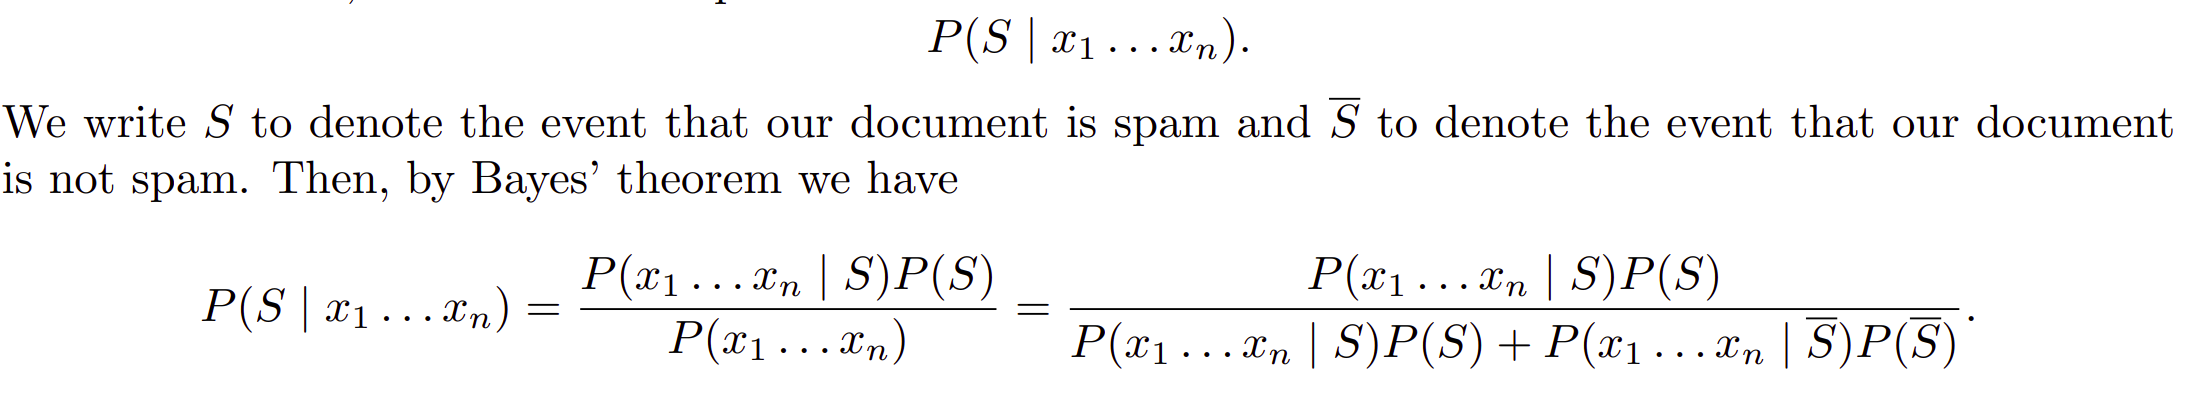

The math works out nicely because the logarithm of a product is the sum of
the logarithms (that is, ln(a · b) = ln a + ln b):

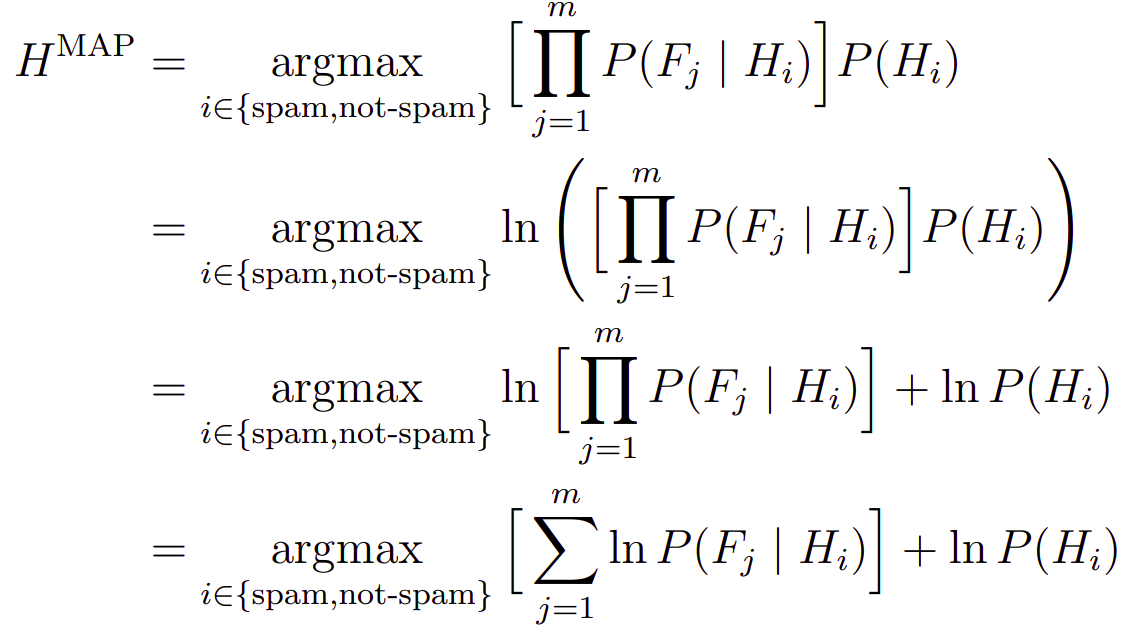

## 4. Conclusion <a class="anchor" id="conclusion"></a>

When we trained Train Data in two different ways, unigram and bigram, in the Naive Bayes Classifier, we saw that unigram's performance metrics were better. When we look at the performance matrices in general, we see that our accuracy score for unigram is around 98% and for Bigram our accuracy score is around 90%. When we look at their precision, we see that our accuracy score for unigram is around 98% and our accuracy score for Bigram is around 90%. When we look at the Recall score, we see that our accuracy score for unigram is around 98%, and our accuracy score for Bigram is around 88%. Since our Recall and Precision scores are not very different and stable, we see that it gives high results like other scores. When we look at the F1 score, we see that our accuracy score for Unigram is around 98% and our accuracy score for Bigram is around 90%. Looking at these data, we can clearly say that Unigram gives better results than Bigram. Adding stopwords didn't make much of a difference for unigram, but we found that it did affect bigram for ham and spam emails. Adding stop words as stopwords affected performance metrics badly, while adding discontinuity words as stopwords affected performance metrics well. Adding english to the stopword worked best. The main reason why discontinued words affected performance measures was the high presence of some pronouns and adjectives (ie items that were ineffective in classification) in both classes. When we didn't add them to our model, our performance matrices improved as expected. When we look at Compile time, we see that our functions run for a very long time while calculating and testing probality. When we compared Bigram and Unigram, we saw that Unigram was compiled in a shorter time than Bigram. As a result, we have seen that Unigram is much more successful than both accuracy metrics and compile time.

## 5. References <a class="anchor" id="references"></a>

https://web.cs.hacettepe.edu.tr/~abc/teaching/bbm406/slides/BayesianLearning.pdf<br>
https://www.cs.rhodes.edu/~kirlinp/courses/ai/f18/projects/proj3/naive-bayes-log-probs.pdf <br>
https://courses.cs.washington.edu/courses/cse446/20wi/Section7/naive-bayes.pdf <br>
https://scikit-learn.org/stable/modules/naive_bayes.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html<br>


**Disclaimer!** <font color='grey'>This notebook was prepared by İsmail Ateş & Mustafa Kollu as a assignment for the *BBM409 : Introduction to Machine Learning Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.